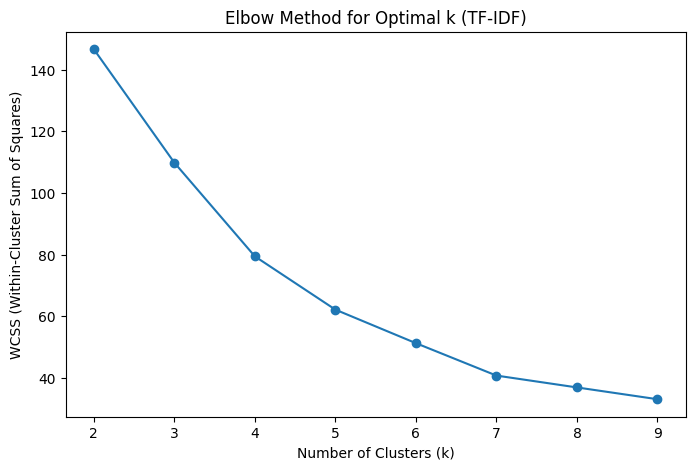

Silhouette Score for TF-IDF Clustering: 0.625


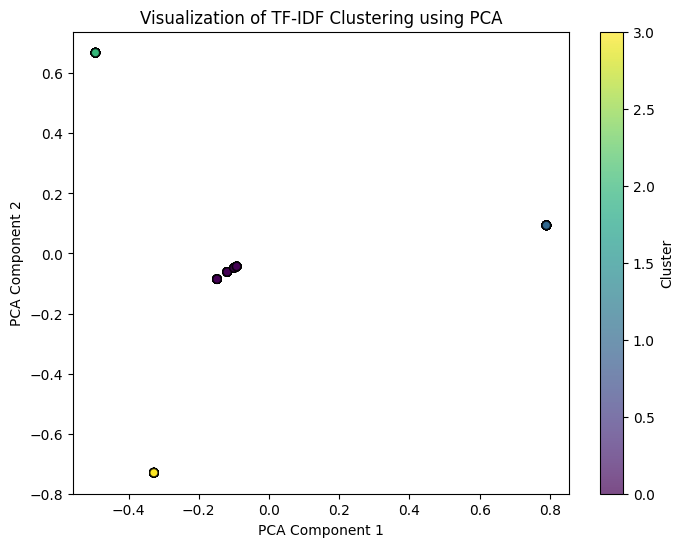

                                                  name  Cluster_TFIDF
0    Some computer science issues in ubiquitous com...              0
1                        Computer science: An overview              0
2                      Foundations of computer science              1
3                         Is computer science science?              0
4     Computer science and its relation to mathematics              1
..                                                 ...            ...
254  Adaptation strategies for climate change in th...              0
255        Climate change and the historic environment              2
256  Climate change environmental degradation and m...              0
257       Antarctic climate change and the environment              0
258  Antarctic climate change and the environment: ...              0

[259 rows x 2 columns]


In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("new_dataset.csv")

# Define text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\\w\\s]', '', text)  # Remove punctuation
    text = re.sub(r'\\d+', '', text)  # Remove numbers
    return text

# Combine 'name' and 'keywords' for richer text representation
df['processed_text'] = df['name'].astype(str) + " " + df['keywords'].astype(str)
df['processed_text'] = df['processed_text'].apply(preprocess_text)

# Apply TF-IDF with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2))  # Use unigrams and bigrams
X_tfidf = vectorizer.fit_transform(df['processed_text'])

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k (TF-IDF)')
plt.show()

# Choose the optimal number of clusters (based on the elbow curve)
optimal_k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_TFIDF'] = kmeans.fit_predict(X_tfidf)

# Compute silhouette score for evaluation
silhouette_avg = silhouette_score(X_tfidf, df['Cluster_TFIDF'])
print(f"Silhouette Score for TF-IDF Clustering: {silhouette_avg:.3f}")

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca_tfidf = pca.fit_transform(X_tfidf.toarray())

# Create scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_tfidf[:, 0], X_pca_tfidf[:, 1], c=df['Cluster_TFIDF'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualization of TF-IDF Clustering using PCA')
plt.colorbar(label='Cluster')
plt.show()

print(df[['name', 'Cluster_TFIDF']])
